# Part2 深度学习实践
1-4章主要是介绍深度学习，以及其工作原理，5-9章将通过实践培养出如何用深度学习解决实际问题。
# 第5章 深度学习用于计算机视觉
理解卷积神经网络  
使用数据增强来降低过拟合  
使用预训练的卷积神经网络进行特征提取  
微调预训练的卷积神经网络  
将卷积神经网络学到的内容及其如何做出分类决策可视化
## 5.4 卷积神经网络简介
深入介绍神经网络原理，以及在计算机视觉任务上为何如此成功。下面是Conv2D层和MaxPooling2D层的堆叠。

In [0]:
# 5-1 实例化一个小型的神经网络
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 5-2 在卷积神经网络上添加分类器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                36928     
__________

In [0]:
# 5-3 在MNIST图像上训练卷积神经网络
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28 ,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
              
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1802 - acc: 0.9434TA: 1:16 - loss: 1.1710 - acc:  - ETA: 1:13 - loss: 1.0856 - acc: 0.654 - ETA: 1:13 - loss: 1.0742 - ETA: 1:09 - loss: 0.9615 - acc: 0.69 - ETA: 1:09 - loss: 0.9532 - acc: 0.697 - ETA: 1:09 - loss: 0.9440 - acc: 0 - ETA: 1:08 - loss: 0.905 - ETA: 1:05 - loss: 0.8170 - acc: 0 - ETA: 1:04 - loss: 0.7926 - - ETA: 1:02 - loss: 0.7382 - acc: 0 - ETA: 1:01 - loss: 0.7181 - acc: - ETA: 56s - loss: 0.5715 - acc: 0.81 - ETA: 56s - loss: 0.5691 - acc: 0.82 - ETA: 55s - loss: 0.5675 - acc: 0. - ETA: 55s - loss: 0.5635 - acc - ETA - ETA: 53s - loss: 0.5203 - acc: 0.83 - ETA: 53s - loss: 0.5187 - acc: 0.83 - ETA:  - ETA: 52s - loss: 0.4903 - a - ETA: 51s - loss: 0.4837 - acc: 0. - ETA: 51s - loss: 0.4808 - acc - ETA: 51s - loss: 0. - ETA:  - ETA: 47s - loss: 0.4202 - acc:  - ETA: 47s - loss: 0.4169 - - ETA: 47s - loss: 0.4122 - a - ETA: 46s - loss: 0. - ETA: 45s - lo - ETA: 42 - ETA: 41s - loss: 0.3460

### 5.1.1 卷积运算
密集连接层：从输入特征空间学习到的是全局模型  
卷积层：学到的是局部模式  
\*卷积神经网络学习到的模式具有平移不变性（translation invariant）。卷积网络在图像右下角学习到某个模式后，可以在任何地方识别这个模式。对于密集连接层只能重新学习。(并且视觉世界从根本上具有平移不变性)  
\*卷积世界网络可以学到模式的空间层次结构（spatial hierarchies  of patterns）。第一层卷积层会学到较小的局部模式（比如边缘），而第二层将第一层的特征组合成更大的模式，从而使卷积层越来越复杂。（并且视觉世界从根本上具有看见层次结构）  
两个空间轴（高度和宽度）和一个深度轴（channel）的3D张量，其卷积叫做特征图（feature map）。


1. padding  
2. stride

### 5.1.2 最大池化运算
在每次MaxPoolingD后，特征图的尺寸会减半。最大池化通常使用2x2的窗口或者步幅2。而卷积通常使用3x3的窗口或者步幅1。            

In [0]:
model_no_max_pool = models.Sequential()
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_no_max_pool.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


\*不利于学习特征的空间层级结构。第三层3x3的窗口仍然只包含初始的输入，卷积神经网络学到的高级模式相对于初始输入来说依然很小。  
\*最后一层每个样本元素有36928个元素，会导致严重的过拟合。

注意，最大池化不是实现这种下采样的唯一方法。你已经知道，还可以在前一个卷积层中使用步幅来实现。此外，你还可以使用平均池化来代替最大池化，其方法是将每个局部输人图块变换为取该图块各通道的平均值，而不是最大值。但最大池化的效果往往比这些替代方法更好。简而言之，原因在于特征中往往编码了某种模式或概念在特征图的不同位置是否存在(因此得名特征图),而观察不同特征的最大值而不是平均值能够给出更多的信息。因此，最合理的子采样策略是首先生成密集的特征图(通过无步进的卷积),然后观察特征每个小图块上的最大激活，而不是查看输入的稀疏窗口(通过步进卷积)或对输人图块取平均，因为后两种方法可能导致错过或淡化特征是否存在的信息。

## 5.2 在小型数据集从头开始训练一个卷积神经网络
### 5.2.1 深度学习与小数据问题的相关性
通常来说，深度学习需要大量数据。但是有时候如果模型很小，并做了很好的正则化，同时任务十分简单，可能几百个样本就足够了。  
此外，神经网络还有高度的可复用性。特别是在计算机视觉领域，许多预训练模型都能公开下载到。

### 5.2.2 下载数据
本章数据在kaggle上https://www.kaggle.com/c/dogs-vs-cats/data
这个数据集包含25000张猫狗图片，大小为543MB，我们创建三个小的子集：每个类别各1000个样本的训练集，每个类别各500个样本验证集和每个类别各500个样本的测试集

In [0]:
# 5-4 将图像复制到训练、验证和测试的目录
import os, shutil

original_dataset_dir = "D:/kaggle_data/kaggle_original_data/train"

In [0]:
#生成保存小数据集的目录
base_dir = 'D:/kaggle_data/cats_and_dogs_small'
os.mkdir(base_dir)

In [0]:
# 对应划分后的序列、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
# 设置猫和狗的训练、验证、测试目录                                                                       
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir , 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir) 

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
# 将图片复制到目录
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))
print('total test cat images:',len(os.listdir(test_cats_dir)))
print('total test dog images:',len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
# 5-4 将图像复制到训练、验证和测试的目录
import os, shutil

original_dataset_dir = "D:/kaggle_data/kaggle_original_data/train"
base_dir = 'D:/kaggle_data/cats_and_dogs_small'

# 1.创建对应划分后的序列、验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# 2.创建猫和狗的训练、验证、测试目录                                                                       
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir , 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir) 

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

# 3.将图片复制到目录
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    #shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    #shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    #shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    #shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    #shutil.copyfile(src, dst)

### 5.2.3 构建网络


In [0]:
# 5-5  将猫狗分类的小型卷积神经网络实例化
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

编译这一步，使用RMSprop优化器。因为网络最后一层是单一sigmoid单元，使用二元交叉熵作为损失函数。

In [0]:
# 5-6 配置模型用于训练
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

### 5.2.4 数据预处理 
（1）读取图像文件  
（2）将JEPG文件解码为RGB像素网络  
（3）将这些像素网络转换为浮点数张量  
（4）将像素值缩放到[0,1]区间  
keras.preprocessing.image能快速创建python生成器。

In [0]:
# 5-7 使用ImageDataGenerator从目录中读取图像 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


train_generator相当于一个迭代器，这里只用fit_generator来拟合数据

In [0]:
# 5-8 利用批量生成器拟合数据
history = model.fit_generator(
        train_generator,
        steps_per_epoch = 100,
        epochs = 30,
        validation_data = validation_generator,
        validation_steps = 50)
# 5-9 保存模型
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 208s 2s/step - loss: 0.6900 - acc: 0.5220 - val_loss: 0.6858 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 207s 2s/step - loss: 0.6570 - acc: 0.6165 - val_loss: 0.6462 - val_acc: 0.6160
Epoch 3/30
100/100 [==============================] - 206s 2s/step - loss: 0.6094 - acc: 0.6625 - val_loss: 0.6267 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 209s 2s/step - loss: 0.5657 - acc: 0.7140 - val_loss: 0.6011 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 205s 2s/step - loss: 0.5318 - acc: 0.7295 - val_loss: 0.5852 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 209s 2s/step - loss: 0.5085 - acc: 0.7495 - val_loss: 0.5784 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 207s 2s/step - loss: 0.4777 - acc: 0.7650 - val_loss: 0.5686 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 208s 2s/step - 

In [0]:
# 5-10 绘制过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

训练精度随时间线性增加，直到接近100%，而验证精度停留在70%左右，显然已经过拟合了。这里我们使用视觉领域的新方法，数据增强（data augmentation）

### 5.2.5 使用数据增强
过拟合的原因是学习样本太少，这里我们生成可信图像。  
rotation_range是角度值（0-180），随机旋转  
width_shift_range和height_shift_range是图像在水平或者垂直方向上平移的范围  
shear_range是随机错切变换的角度  
zoom_range是图像随机缩放的范围  
horizontal_flip是随机将一般图像水平翻转  
flip_mode是用于填充新建图像的方法

In [0]:
# 5-11 利用ImageDatagenerator来设置数据增强
datagen= ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

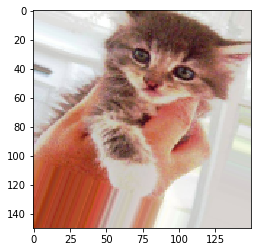

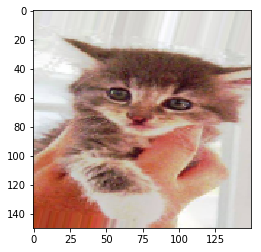

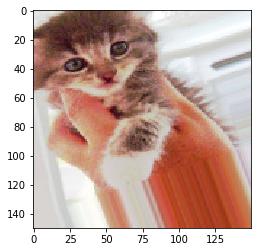

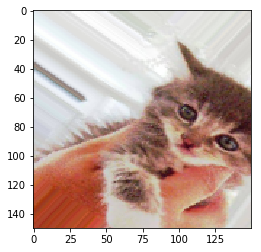

In [0]:
# 5-12 显示几个随机增强后的训练图像
from keras.preprocessing import image
import matplotlib.pyplot as plt 

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

这里再添加Dropout层

In [0]:
# 5-13 定义一个包含dropout的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ['acc'])

In [0]:
# 5-14 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

# 5-15 保存模型
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 180s 2s/step - loss: 0.6916 - acc: 0.5294 - val_loss: 0.7430 - val_acc: 0.4962
Epoch 2/100
100/100 [==============================] - 187s 2s/step - loss: 0.6855 - acc: 0.5438 - val_loss: 0.6833 - val_acc: 0.5152
Epoch 3/100
100/100 [==============================] - 198s 2s/step - loss: 0.6747 - acc: 0.5719 - val_loss: 0.6762 - val_acc: 0.5489
Epoch 4/100
100/100 [==============================] - 193s 2s/step - loss: 0.6460 - acc: 0.6256 - val_loss: 0.6809 - val_acc: 0.5882
Epoch 5/100
100/100 [==============================] - 196s 2s/step - loss: 0.6373 - acc: 0.6309 - val_loss: 0.6463 - val_acc: 0.5964
Epoch 6/100
100/100 [==============================] - 184s 2s/step - loss: 0.6244 - acc: 0.6428 - val_loss: 0.5929 - val_acc: 0.6815
Epoch 7/100
100/100 [==============================] - 183s 2s/step - loss: 0.6133 - acc: 0.6631 - val_loss: 0.5

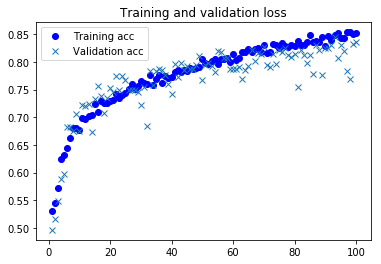

In [0]:
# 5-10 绘制过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'x', label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5.3 使用预训练的卷积神经网络
想要将深度学习应用于小型图像数据集，一种常用非常高效的方法是使用预训练网络。使用预训练的两种方法：特征提取和微调模型  
### 5.3.1 特征提取
用于图像分类的卷积神经网络包括两部分：一系列的池化层和卷积层。特征提取是取出之前训练好的网络的卷积基，在上面运行新数据。

In [0]:
# 5-16 将VGG16卷积基实例化
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.不使用预训练的卷积提取特征

In [0]:
# 5-17 使用预训练的卷积基提取特征
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'D:/kaggle_data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [0]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
# 5-18 定义并训练密集连接分类器
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 10s 5ms/step - loss: 0.5790 - acc: 0.6835 - val_loss: 0.4431 - val_acc: 0.8220A: 21s - loss: 0.6695 - acc:  - ETA: 18s - loss: 0. - ETA: 12s - loss: 0.6 - ETA: 9s - loss: 0.6556 - acc: 0.621 - ETA: - ETA: 3s
Epoch 2/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4136 - acc: 0.8175 - val_loss: 0.3612 - val_acc: 0.8520 - acc: 0.802 - ETA: 2s - loss: 0.4296 - acc: 0.8 - ETA: 1s - loss: 0.4309 - ETA: 0s - loss: 0.4213 - acc: 0 - ETA: 0s - loss: 0.4182 - acc
Epoch 3/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3541 - acc: 0.8565 - val_loss: 0.3222 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 8s 4ms/step - loss: 0.3076 - acc: 0.8735 - val_loss: 0.3035 - val_acc: 0.8700
Epoch 5/30
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2840 - acc: 0.8870 - val_loss: 0.2833 - val_acc: 0.883003 - ac - ETA:

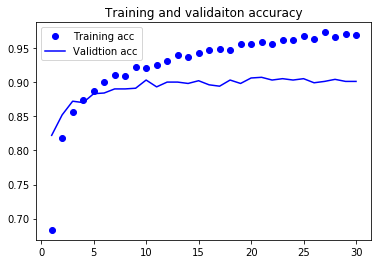

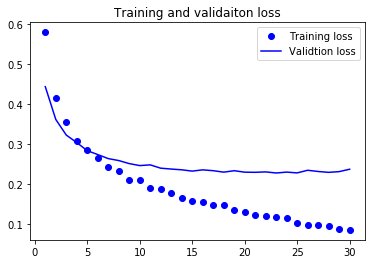

In [0]:
# 5-19 绘制结果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validtion acc')
plt.title('Training and validaiton accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validtion loss')
plt.title('Training and validaiton loss')
plt.legend()

plt.show()

2.使用数据增强的特征提取

In [0]:
# 5-20 在卷积基上添加一个密集连接分类器
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


在编译和训练模型之前，要冻结卷积基。

In [0]:
# 5-21 利用冻结的卷积基端到端地训练模型
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps= 50)

model.save('cats_and_dogs_small_3.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 90/100 [==========================>...] - ETA: 2:26 - loss: 0.5111 - acc: 0.7317

KeyboardInterrupt: 

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5.3.2 微调模型  
对于提取的冻结的模型基，微调让顶层的几层解冻。  
卷积基中更靠底层的编码是更可复用特征，靠顶层则更专业化的特征。  
参数训练越多，过拟合风险越大。

In [0]:
# 5-22 冻结直到某一层的所有层
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if(layer.name == 'block5_conv1'):
        set_trainable = True
    if(set_trainable):
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
# 5-23 微调模型
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-5),
             metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50)

model.save('cats_and_dogs_small_4.h5')

Epoch 1/100
 13/100 [==>...........................] - ETA: 9:14 - loss: 0.3830 - acc: 0.8308

KeyboardInterrupt: 

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# 5-24 使曲线变得平滑
def smooth_curve(points, factor = 0.8):
    smoothed_points = []
    for point in points:
        if(smoothed_points):
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label = 'Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label = 'Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label = 'Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test_acc:', test_acc)

### 5.3.3 小结
卷积神经网络是用于计算机视觉最佳的机器学习模型。  
在小型数据集上主要问题是过拟合，可以使用数据增强。  
利用特征提取，很容易将现有的卷积神经网络复用于新的数据集。  
还可以使用微调，将现有的模型之前学到的一些数据表示应用于新问题。

## 5.4 卷积神经网络的可视化
可视化神经网络的中间输出  
可视化神经网络的过滤器  
可视化图像中类激活的热力图

### 5.4.1 可视化中间激活
对给定输入，激活函数的输出。

In [0]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# 5-25 预处理单张图像
img_path = 'D:/kaggle_data/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


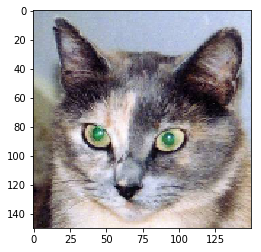

In [0]:
# 5-26 显示测试图像
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
# 5-27 用一个输入张量和一个输出张量列表将模型实例化
from keras import models

# 提取前8层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]
# print(layer_outputs.value)
for i in layer_outputs:
    print(i)
# 创建一个模型，给定模型输入，可以返回这些输出
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activation_model.summary()

Tensor("conv2d_5_2/Relu:0", shape=(?, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d_5_2/MaxPool:0", shape=(?, 74, 74, 32), dtype=float32)
Tensor("conv2d_6_2/Relu:0", shape=(?, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_6_2/MaxPool:0", shape=(?, 36, 36, 64), dtype=float32)
Tensor("conv2d_7_2/Relu:0", shape=(?, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_7_2/MaxPool:0", shape=(?, 17, 17, 128), dtype=float32)
Tensor("conv2d_8_2/Relu:0", shape=(?, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_8_2/MaxPool:0", shape=(?, 7, 7, 128), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (No

In [0]:
# 5-28 以预测模式运行模型
activations = activation_model.predict(img_tensor)

# 对于输入的猫图像第一个卷积层的激活如下
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


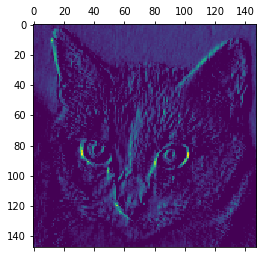

In [0]:
# 5-29 将第4个通道可视化
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis')
plt.show()

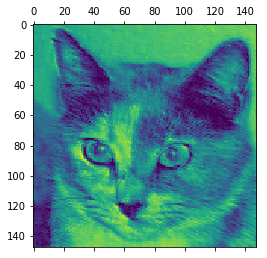

In [0]:
# 5-30 将第7个通道可视化
plt.matshow(first_layer_activation[0, :, :, 7], cmap = 'viridis')
plt.show()

In [0]:
# 5-31 将每个中间激活的所有通道可视化
layer_names = []

# 每一个层的名字
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

# 显示特征图
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # 特征图的特征个数
    
    size = layer_activation.shape[1] # 特征图的形状 148 74 72 36 34 17 15 7
    
    n_cols = n_features // images_per_row # 32 32 64 64 128 128 128 128 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, 
                                             :, :, 
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 225).astype('uint8')
            display_grid[col * size : (col + 1 ) * size,
                        row * size : (row + 1) * size] = channel_image
            
    scale = 1./size
    plt.figure(figsize = (scale * display_grid.shape[1],
                         scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

C:\Users\adward\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


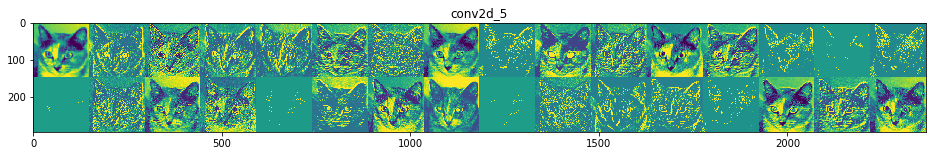

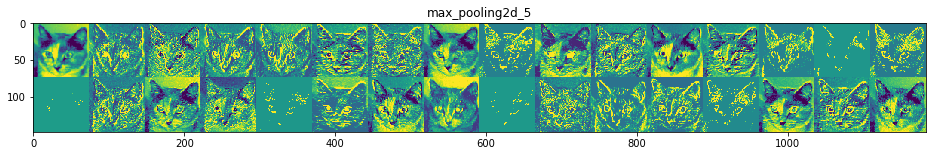

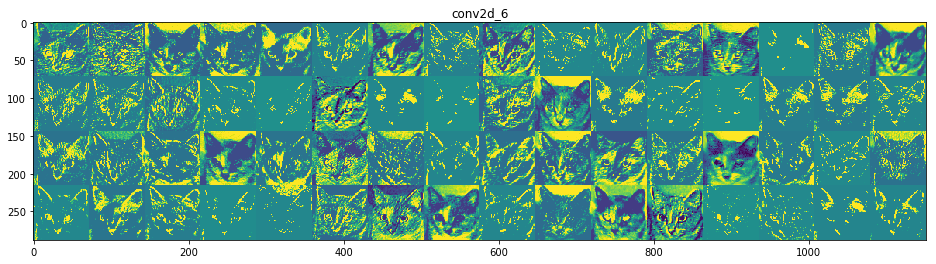

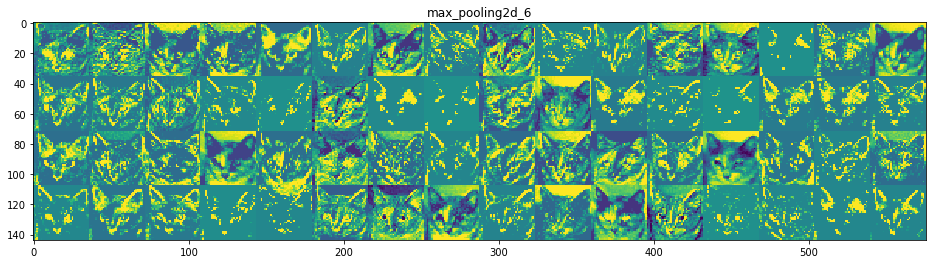

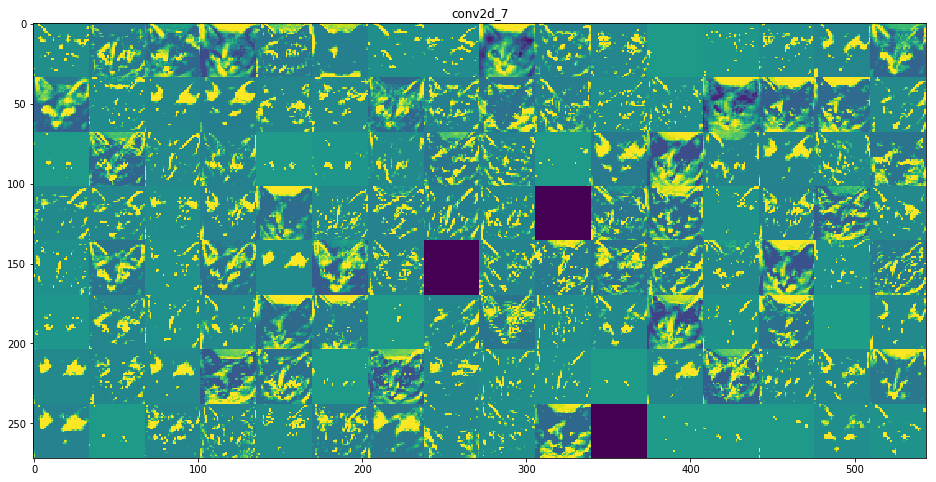

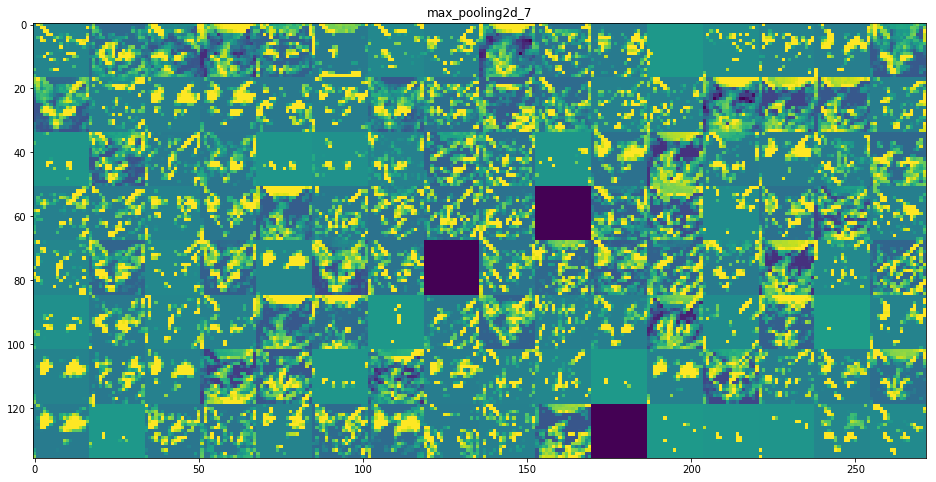

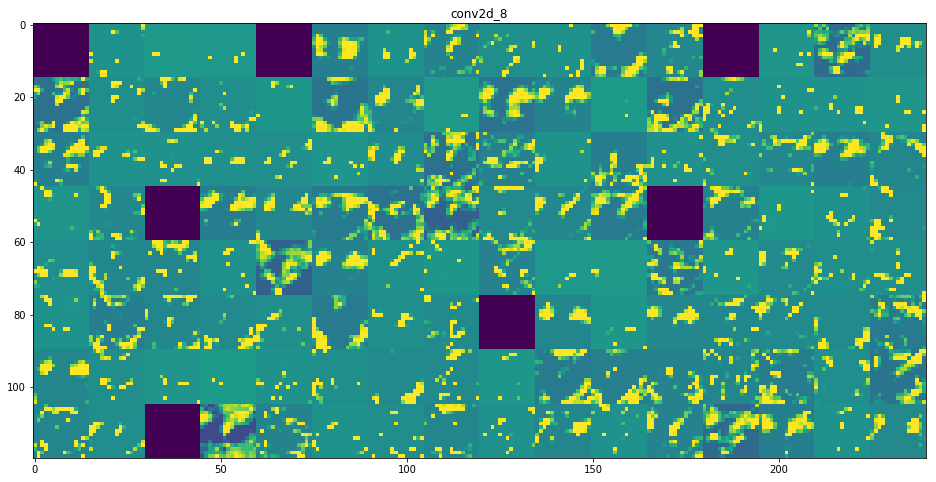

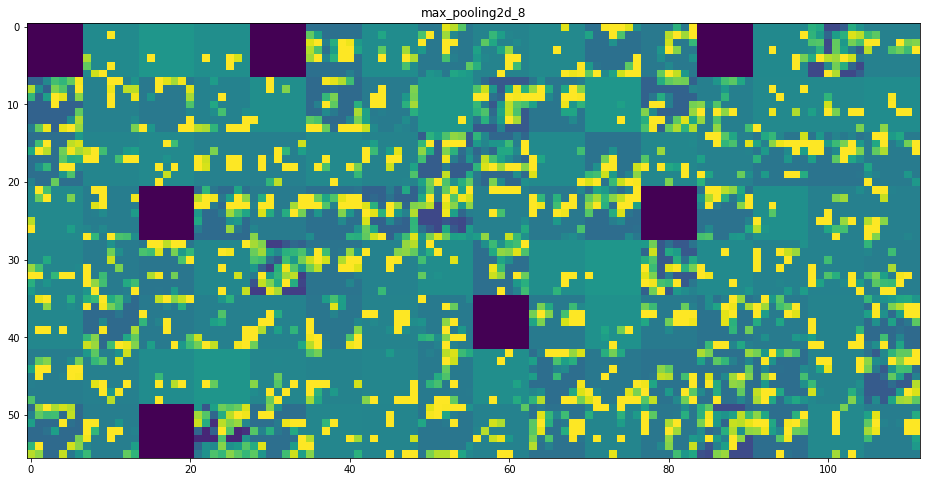

In [0]:
plt.show()

In [0]:
for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name)
    print(layer_activation.shape)

conv2d_5
(1, 148, 148, 32)
max_pooling2d_5
(1, 74, 74, 32)
conv2d_6
(1, 72, 72, 64)
max_pooling2d_6
(1, 36, 36, 64)
conv2d_7
(1, 34, 34, 128)
max_pooling2d_7
(1, 17, 17, 128)
conv2d_8
(1, 15, 15, 128)
max_pooling2d_8
(1, 7, 7, 128)


第一层是各种边缘探测器的集合，几乎保留了原始图像所有信息。  
随着层数的加深，激活变得越来越抽象，难以理解。  
激活的稀疏度随着层数的加深而增大。

### 5.4.2 可视化卷积神经网络的过滤器
有助于精确理解卷积神经网络中，每个过滤器容易接受的视觉模式或视觉概念

In [0]:
# 5-32 为过滤器的可视化定义损失张量
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights = 'imagenet',
             include_top = False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [0]:
print(loss)
print(layer_output)
print(K.gradients(loss, model.input))

Tensor("Mean_132:0", shape=(), dtype=float32)
Tensor("block3_conv1_3/Relu:0", shape=(?, ?, ?, 256), dtype=float32)
[<tf.Tensor 'gradients_452/block1_conv1_3/convolution_grad/Conv2DBackpropInput:0' shape=(?, ?, ?, 3) dtype=float32>]


In [0]:
# 5-33 获取损失相对于输入的梯度
grads = K.gradients(loss, model.input)[0]

In [0]:
# 5-34 梯度标准化技巧
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
# 5-35 给定Numpy输入值，得到Numpy输出值
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# 5-36 通过随机梯度下降让损失最大化
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    
    input_img_data += grads_value * step

In [0]:
# 5-37 将张量转换为有效图像的实用函数
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0 , 255).astype('uint8')
    return x

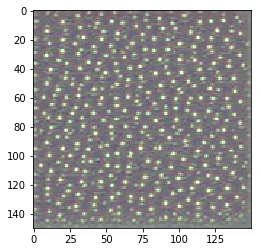

In [0]:
# 5-38 生成过滤器可视化的函数
def generate_pattern(layer_name, filter_index, size = 150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

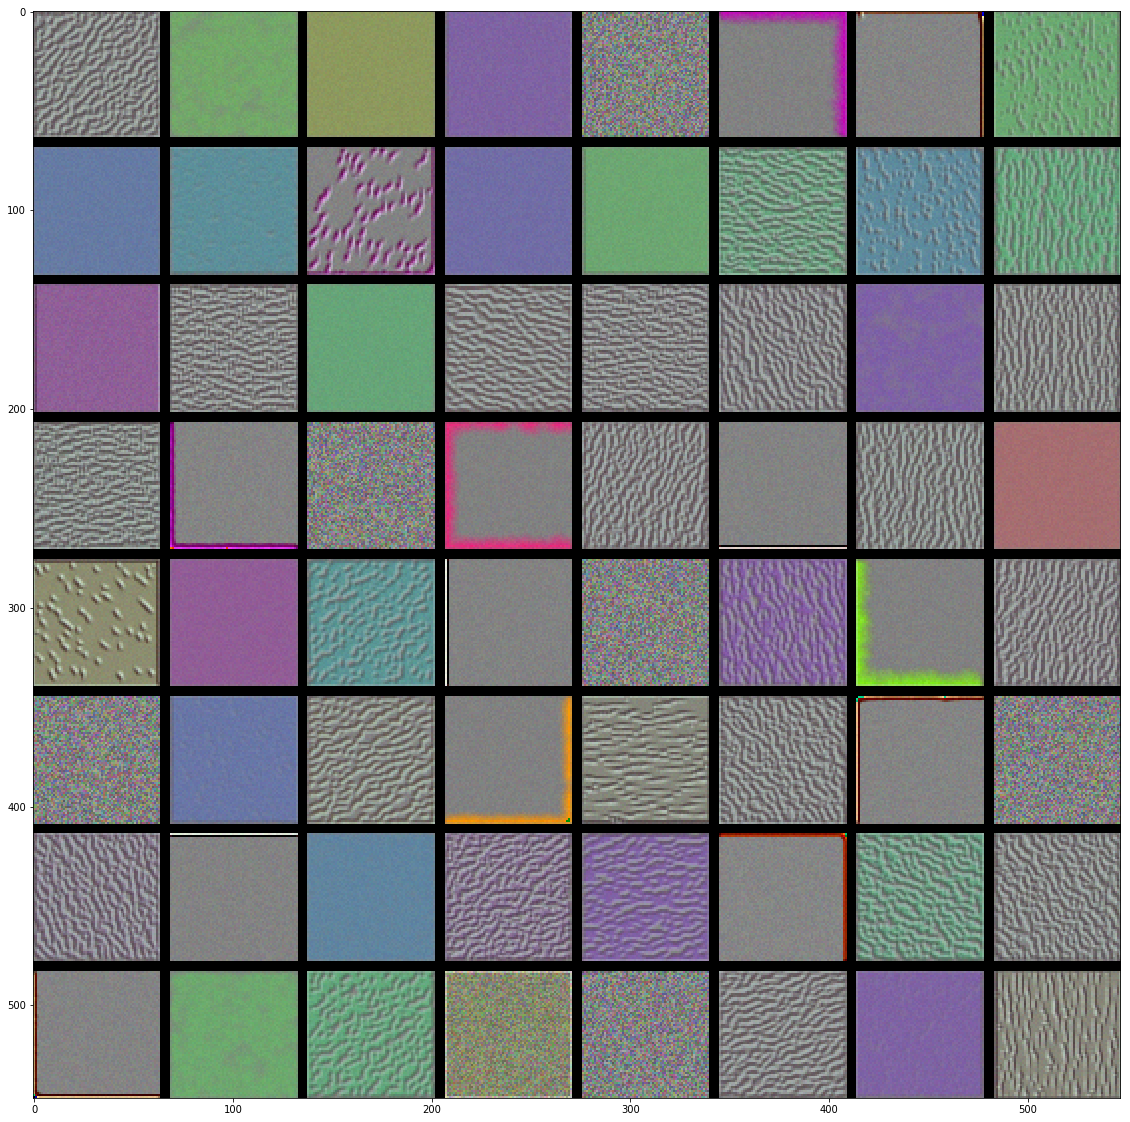

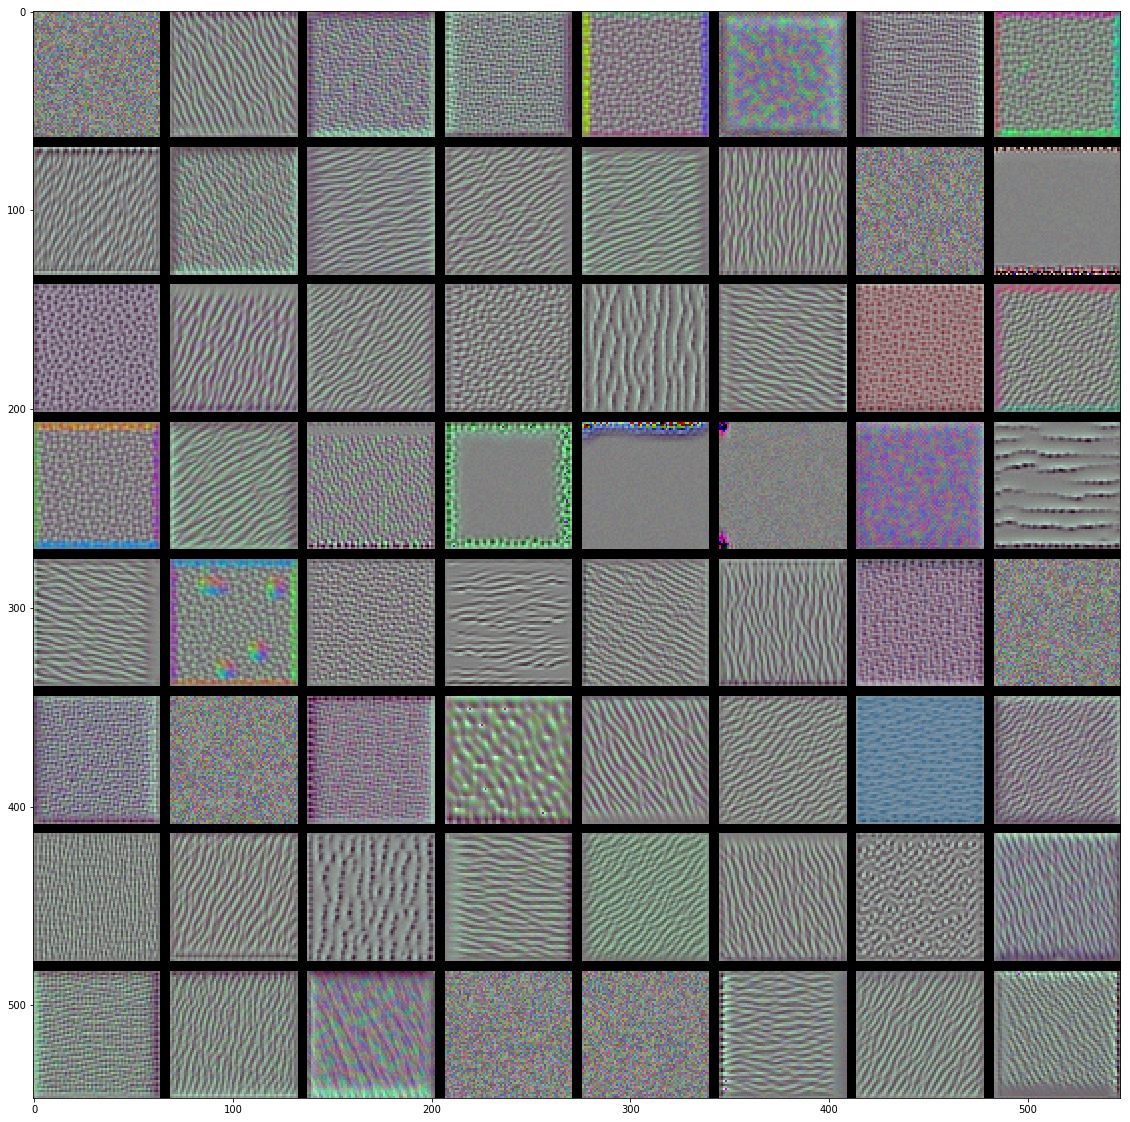

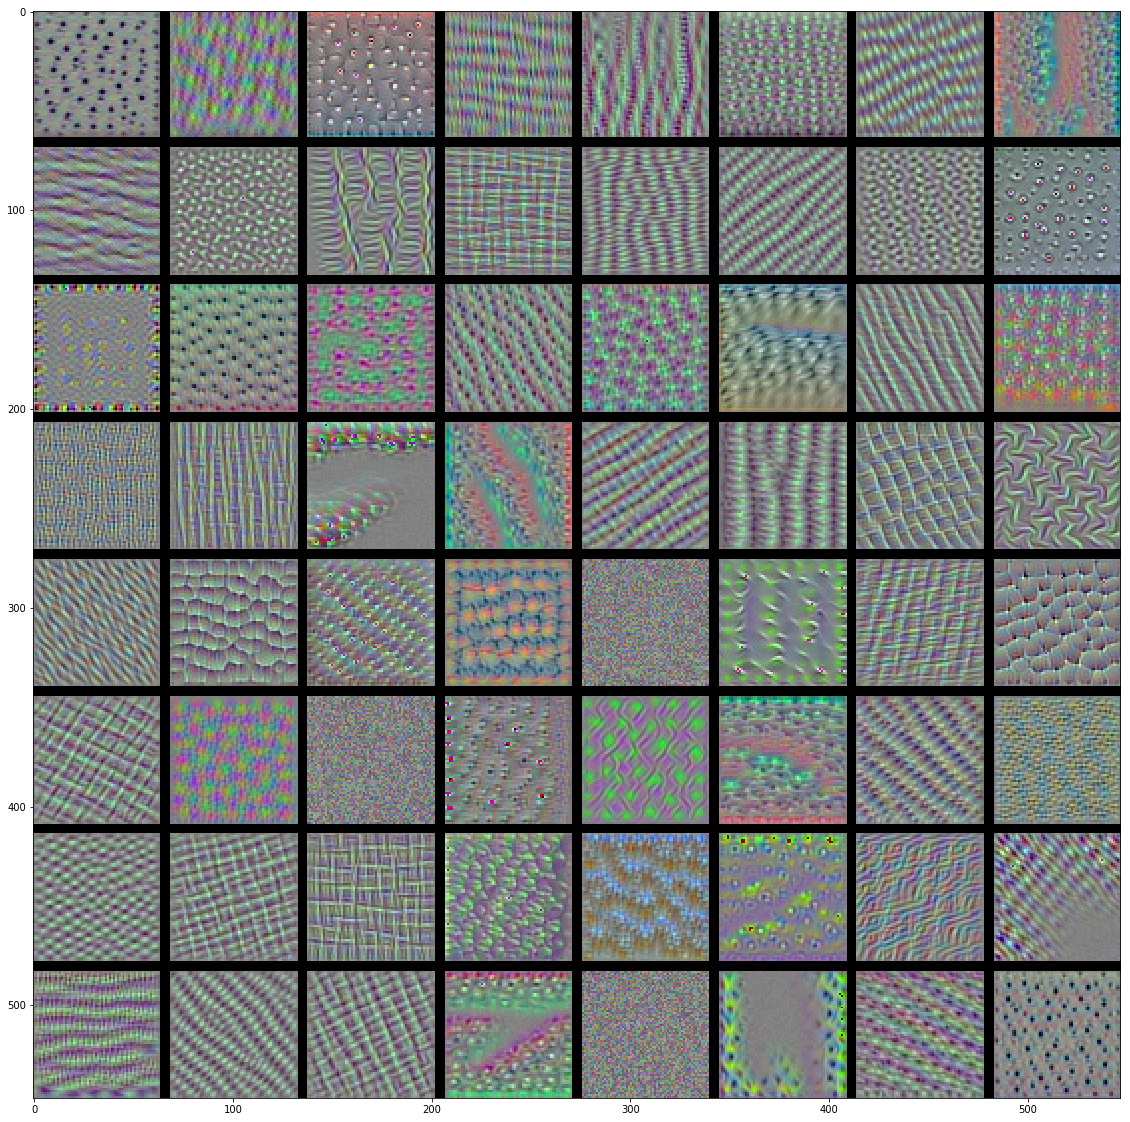

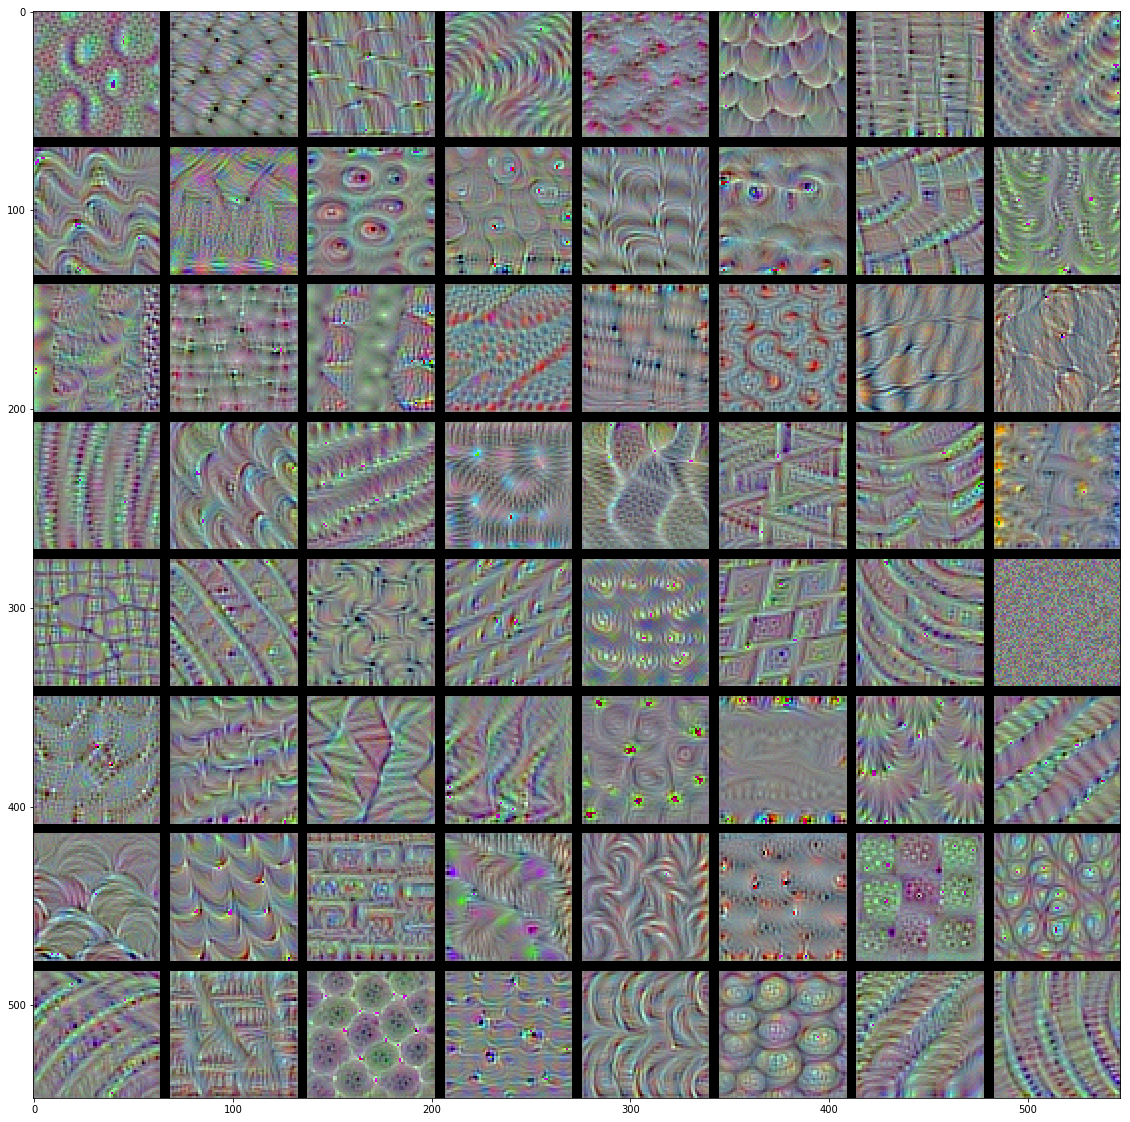

In [0]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 存储结果
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

    for i in range(8):  # 循环结果网络的行
        for j in range(8): #循环列
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # 展示结果
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

### 5.4.3 可视化类激活的热力图
Grad-CAM

In [1]:
# 5-40 加载带有预训练权重的VGG16网络
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet')

Using TensorFlow backend.


In [3]:
# 5-41 为VGG16模型预处理一张输入图像
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '' # 目标图像的本地路径

img = image.load_img(img_path, target_size = (224, 224)) # 大小为224x224的图形库图像

x = image.img_to_array(img) # 大小为224,224,3的numpy数组

x = np.enpand_dims(x, axis = 0) # 添加一个维度 转化为1,224,224,3

x = preprocess_input(x) # 对批量预处理

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top = 3)[0])

AttributeError: ignored

为了展示图像中的哪些部分最像非洲象，使用Grad-CAM算法

In [0]:
# 5-42 应用Grad-CAM算法
african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradient(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis = (0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)

In [0]:
# 5-43 热力图后处理
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [0]:
# 5-44 将热力图与原始图像叠加
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('', superimposed_img)